In [1]:
pip install tensorboard

In [2]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/moncoachdata/DATA_DEEP_LEARNING/master/cancer_classification.csv'
df = pd.read_csv(url)

In [3]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [11]:
# x et y 
X = df.iloc [ : , :-1 ] .values 
y = df.iloc [ : , -1 ] .values 

In [20]:
# set de train et test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [21]:
# normalise 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler ()
X_train = scaler.fit_transform ( X_train )
X_test = scaler.transform ( X_test )

In [22]:
X_train.shape

(455, 30)

In [50]:
from tensorflow.keras.callbacks import  TensorBoard
%load_ext tensorboard    #charger l extension

# creation du dossier de logs 
log_directory = 'logs\\fit'

#appel tensorboard
board_callback = TensorBoard(log_dir=log_directory , 
                                   histogram_freq=1 ,
                                   write_graph = True ,
                                   write_images = True ,
                                   update_freq = 'epoch' ,
                                   profile_batch = 2 , 
                                   embeddings_freq =1   )


In [51]:
#reseau de neurone
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

model = Sequential ()
model.add( Dense ( 30 , activation = 'relu')  )
model.add( Dropout (0.3)  )
model.add( Dense ( 20 , activation = 'relu')  )
model.add( Dropout ( 0.5 ))
model.add( Dense ( 10 , activation = 'relu')  )
model.add(Dropout   (0.5 ))
model.add( Dense ( 5 , activation = 'relu')  )
model.add( Dense ( 1 , activation = 'sigmoid')  )

model.compile ( optimizer='Adam',
                loss= 'binary_crossentropy')

ea_stop = EarlyStopping ( monitor='val_loss',
                          mode = 'min' ,   #minimisé la val loss
                          verbose = 1 ,   # rapport
                          patience=15 )

model.fit ( x=X_train,
    y=y_train,
    epochs=300,
    callbacks = [ea_stop , board_callback] ,
    validation_data=(X_test,y_test),)


Epoch 1/300
 1/15 [=>............................] - ETA: 0s - loss: 0.7205WARNING:tensorflow:From C:\Users\bilel\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
15/15 [==============================] - 1s 85ms/step - loss: 0.6929 - val_loss: 0.6717
Epoch 2/300
15/15 [==============================] - 0s 13ms/step - loss: 0.6861 - val_loss: 0.6635
Epoch 3/300
15/15 [==============================] - 0s 13ms/step - loss: 0.6648 - val_loss: 0.6506
Epoch 4/300
15/15 [==============================] - 0s 11ms/step - loss: 0.6694 - val_loss: 0.6307
Epoch 5/300
15/15 [==============================] - 0s 11ms/step - loss: 0.6550 - val_loss: 0.6191
Epoch 6/300
15/15 [==============================] - 0s 10ms/step - loss: 0.6402 - val_loss: 0.5989
Epoch 7/300
15/15 [==============================] - 0s

15/15 [==============================] - 0s 9ms/step - loss: 0.1027 - val_loss: 0.0701
Epoch 77/300
15/15 [==============================] - 0s 11ms/step - loss: 0.1183 - val_loss: 0.0564
Epoch 78/300
15/15 [==============================] - 0s 8ms/step - loss: 0.1320 - val_loss: 0.0576
Epoch 79/300
15/15 [==============================] - 0s 8ms/step - loss: 0.1201 - val_loss: 0.0575
Epoch 80/300
15/15 [==============================] - 0s 8ms/step - loss: 0.1460 - val_loss: 0.0663
Epoch 81/300
15/15 [==============================] - 0s 8ms/step - loss: 0.1260 - val_loss: 0.0546
Epoch 82/300
15/15 [==============================] - 0s 9ms/step - loss: 0.1089 - val_loss: 0.0635
Epoch 83/300
15/15 [==============================] - 0s 9ms/step - loss: 0.1402 - val_loss: 0.0537
Epoch 84/300
15/15 [==============================] - 0s 9ms/step - loss: 0.1133 - val_loss: 0.0674
Epoch 85/300
15/15 [==============================] - 0s 8ms/step - loss: 0.1202 - val_loss: 0.0589
Epoch 86/300

<AxesSubplot:>

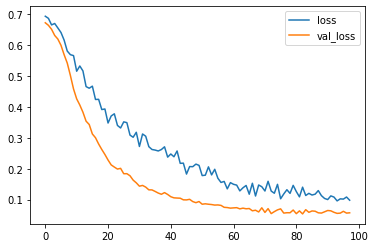

In [52]:
# courbe d apprentissage 
pd.DataFrame (model.history.history ).plot()

In [53]:
# metrics d erreurs 

from sklearn.metrics import classification_report 
pred = model.predict (X_test).reshape (114,)
pred = (pred>0.5).astype ('int')
print (classification_report ( pred , y_test ))

pd.crosstab(y_test, pred)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



col_0,0,1
row_0,,
0,42,1
1,1,70


In [54]:
print (log_directory)

logs\fit


In [57]:
# manceùent de tensor board 
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 5540), started 0:01:53 ago. (Use '!kill 5540' to kill it.)